In [1]:
!wget https://github.com/shubham0204/Dataset_Archives/blob/master/face_landmarks_cleaned.zip?raw=true -O data.zip

--2022-04-29 16:23:43--  https://github.com/shubham0204/Dataset_Archives/blob/master/face_landmarks_cleaned.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/shubham0204/Dataset_Archives/raw/master/face_landmarks_cleaned.zip [following]
--2022-04-29 16:23:43--  https://github.com/shubham0204/Dataset_Archives/raw/master/face_landmarks_cleaned.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/face_landmarks_cleaned.zip [following]
--2022-04-29 16:23:44--  https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/face_landmarks_cleaned.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuserco

In [2]:
!unzip data.zip

Archive:  data.zip
   creating: face_landmarks_cleaned/
  inflating: face_landmarks_cleaned/x_test.npy  
  inflating: face_landmarks_cleaned/x_train.npy  
  inflating: face_landmarks_cleaned/y_test.npy  
  inflating: face_landmarks_cleaned/y_train.npy  


In [3]:
import numpy as np

In [4]:
x_train = np.load( "face_landmarks_cleaned/x_train.npy" ) / 255
y_train = np.load( "face_landmarks_cleaned/y_train.npy" ) / 96
x_test = np.load( "face_landmarks_cleaned/x_test.npy" ) / 255
y_test = np.load( "face_landmarks_cleaned/y_test.npy" ) / 96

y_train = np.reshape( y_train , ( -1 , 1 , 1 , 30 ))
y_test = np.reshape( y_test , ( -1 , 1 , 1 , 30 ))

In [5]:
import tensorflow as tf

In [6]:
model_layers = [
                
    tf.keras.layers.Conv2D( 256 , input_shape=( 96 , 96 , 1 ) , kernel_size=( 3 , 3 ) , strides=2 , activation='relu' ),
    tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=2 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 30 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 30 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 30 , kernel_size=( 3 , 3 ) , strides=1 ),

]
model = tf.keras.Sequential( model_layers )
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) , metrics=[ 'mse' ] )


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
model.fit(x=x_train, y=y_train, epochs=250, batch_size=50)

Epoch 1/250
30/30 [==============================] - 16s 152ms/step - loss: 0.3350 - mse: 0.3350
Epoch 2/250
30/30 [==============================] - 4s 120ms/step - loss: 0.1282 - mse: 0.1282
Epoch 3/250
30/30 [==============================] - 4s 120ms/step - loss: 0.0568 - mse: 0.0568
Epoch 4/250
30/30 [==============================] - 4s 120ms/step - loss: 0.0340 - mse: 0.0340
Epoch 5/250
30/30 [==============================] - 4s 121ms/step - loss: 0.0235 - mse: 0.0235
Epoch 6/250
30/30 [==============================] - 4s 121ms/step - loss: 0.0173 - mse: 0.0173
Epoch 7/250
30/30 [==============================] - 4s 121ms/step - loss: 0.0138 - mse: 0.0138
Epoch 8/250
30/30 [==============================] - 4s 120ms/step - loss: 0.0113 - mse: 0.0113
Epoch 9/250
30/30 [==============================] - 4s 121ms/step - loss: 0.0098 - mse: 0.0098
Epoch 10/250
30/30 [==============================] - 4s 120ms/step - loss: 0.0084 - mse: 0.0084
Epoch 11/250
30/30 [==================

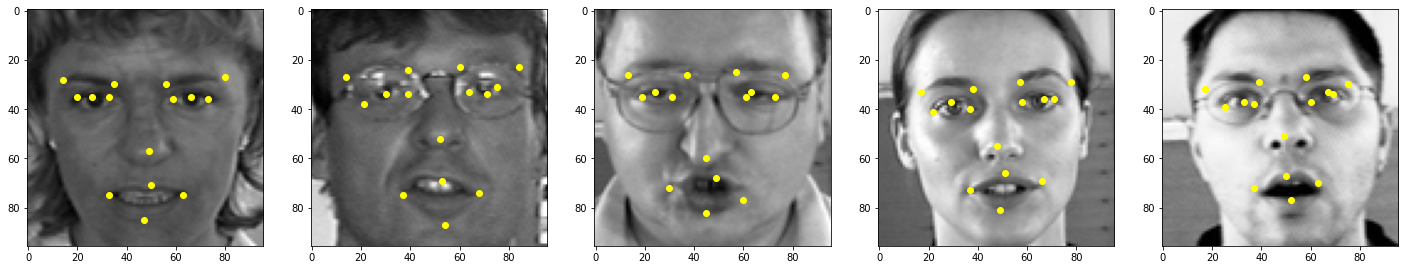

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=( 50 , 50 ))

for i in range( 1 , 6 ):
    sample_image = np.reshape( x_test[i] * 255  , ( 96 , 96 ) ).astype( np.uint8 )
    pred = model.predict( x_test[ i : i +1  ] ) * 96
    pred = pred.astype( np.int32 )
    pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )
    fig.add_subplot( 1 , 10 , i )
    plt.imshow( sample_image.T , cmap='gray' )
    plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )
    
plt.show()